<a href="https://colab.research.google.com/github/gulsung/BoksOyunu/blob/master/veribilimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# kütüphaneleri import edelim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#Python'daki uyarıları kapatalım
import warnings
warnings.filterwarnings("ignore")

In [2]:
 #veriyi içeri aktaralım
 veri = pd.read_csv("olimpiyatlar.csv.csv")
 veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#veri hakkında bilgi
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16663 entries, 0 to 16662
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      16663 non-null  object 
 1   cinsiyet  16663 non-null  object 
 2   yas       16663 non-null  float64
 3   boy       16663 non-null  float64
 4   kilo      16663 non-null  float64
 5   takim     16663 non-null  object 
 6   uok       16663 non-null  object 
 7   yil       16663 non-null  int64  
 8   sezon     16663 non-null  object 
 9   sehir     16663 non-null  object 
 10  spor      16663 non-null  object 
 11  etkinlik  16663 non-null  object 
 12  madalya   16662 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.7+ MB


In [5]:
#Veri temizlenmesi
#Sütun isimlerinin düzenlenmesi
veri.columns

Index(['isim', 'cinsiyet', 'yas', 'boy', 'kilo', 'takim', 'uok', 'yil',
       'sezon', 'sehir', 'spor', 'etkinlik', 'madalya'],
      dtype='object')

In [6]:
#sütun isimlerini değiştirelim
#veri.rename(columns={'isim'    : 'Name',
                     #'cinsiyet': 'Gender',
                     #'yas'     : 'age',
                     #'boy'     : 'Height',
                     #'kilo'    : 'Weight',
                     #'takim'   : 'Team',
                     #'uok'     : 'NOC',
                     #'yil'     : 'Year',
                     #'sezon'   : 'Season',
                     #'sehir'   : 'City',
                     #'spor'    : 'Sport',
                     #'etkinlik': 'Event',
                     #'madalya' : 'Medal'}, inplace = True)
#veri.head(2)

In [7]:
# drop fonksiyonu ile id ve oyunlar sütunlarını çıkaralım(ben de yok ondan yapmadım)
# veri = veri.drop(["id","oyunlar"], axis=1) axis= 1 sütun manasında

In [8]:
#kayıp veri sorunu


In [9]:
#boy ve kilo sütunu kayıp veri doldurma
essiz_etkinlik = pd.unique(veri.etkinlik)
print("Eşsiz etkinlik sayısı: {}".format(len(essiz_etkinlik)))
essiz_etkinlik[:10]

Eşsiz etkinlik sayısı: 720


array(["Tug-Of-War Men's Tug-Of-War",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Ice Hockey Men's Ice Hockey",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Pommelled Horse", "Alpine Skiing Men's Super G",
       "Alpine Skiing Men's Giant Slalom"], dtype=object)

In [10]:
#her bir etkinliği iteratif olarak dolaş
# her bir etkinlik özelinde boy ve kilo ortalamalarını hesapla
#etkinlik özelinde kayıp boy ve kilo değerlerini etkinlik ortalamalarına eşitleyelim

veri_gecici = veri.copy() #gerçek veriyi bozmamak için bir kopyasını oluşturalım
boy_kilo_liste = ["boy", "kilo"]

for e in essiz_etkinlik: #liste içerisinde dolaş

    #etkinlik filtresi oluşturalım
    etkinlik_filtre = veri_gecici.etkinlik == e
    #veriyi etkinliğe göre filtreleyelim
    veri_filtreli = veri_gecici[etkinlik_filtre]

    #boy ve kilo için etkinlik özelinde ortalamaları hesaplayalım
    for s in boy_kilo_liste:
      ortalama = np.round(np.mean(veri_filtreli[s]),2)
      if ~np.isnan(ortalama): #eğer etkinlik özelinde ortalama varsa 
          veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
      else: #eğer etkinlik özelinde ortalama varsa ortalamayı hesapla
          tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
          veri_filtresi[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)
    #etkinlik özelinde kayıp değerleri doldurulmuş olan veriyi, veri_gecici
    veri_gecici[etkinlik_filtre] = veri_filtreli
#kayıp değerleri giderilmiş olan geçici veriyi gerçek veriye eşitleyelim
veri = veri_gecici.copy()
veri.info() #boy ve kilo sütunlarında kayıp değer sayısına bakalım

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16663 entries, 0 to 16662
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      16663 non-null  object 
 1   cinsiyet  16663 non-null  object 
 2   yas       16663 non-null  float64
 3   boy       16663 non-null  float64
 4   kilo      16663 non-null  float64
 5   takim     16663 non-null  object 
 6   uok       16663 non-null  object 
 7   yil       16663 non-null  int64  
 8   sezon     16663 non-null  object 
 9   sehir     16663 non-null  object 
 10  spor      16663 non-null  object 
 11  etkinlik  16663 non-null  object 
 12  madalya   16662 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.7+ MB


In [11]:
#yaş sütunu kayıp veri doldurma
#yaş değişkeninde tanımlı olmayan değerleri bulalım
yas_ortalamasi = np.round(np.mean(veri.yas),2)
print("Yaş Ortalaması: {}".format(yas_ortalamasi))
veri["yas"] = veri["yas"].fillna(yas_ortalamasi)
veri.info()

Yaş Ortalaması: 25.89
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16663 entries, 0 to 16662
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      16663 non-null  object 
 1   cinsiyet  16663 non-null  object 
 2   yas       16663 non-null  float64
 3   boy       16663 non-null  float64
 4   kilo      16663 non-null  float64
 5   takim     16663 non-null  object 
 6   uok       16663 non-null  object 
 7   yil       16663 non-null  int64  
 8   sezon     16663 non-null  object 
 9   sehir     16663 non-null  object 
 10  spor      16663 non-null  object 
 11  etkinlik  16663 non-null  object 
 12  madalya   16662 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.7+ MB


In [12]:
#madalya alamayan sporcuları veri setinden çıkar
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

1

In [13]:
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)

In [14]:
veri = veri[madalya_degiskeni_filtresi]
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [15]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16662 entries, 0 to 16661
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      16662 non-null  object 
 1   cinsiyet  16662 non-null  object 
 2   yas       16662 non-null  float64
 3   boy       16662 non-null  float64
 4   kilo      16662 non-null  float64
 5   takim     16662 non-null  object 
 6   uok       16662 non-null  object 
 7   yil       16662 non-null  int64  
 8   sezon     16662 non-null  object 
 9   sehir     16662 non-null  object 
 10  spor      16662 non-null  object 
 11  etkinlik  16662 non-null  object 
 12  madalya   16662 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.8+ MB


In [16]:
# Sonradan kullanabilmek için veriyi kaydedelim
veri.to_csv("olimpiyatlar_temizlenmis.csv", index = False)

In [17]:
# öncelikli olarak histogram grafiklerini çizdirebileceğimiz fonksiyonu yazalım
def plotHistogram(degisken):
    """
       Girdi: Değişken/sütun ismi
       Çıktı: İlgili değişkenin histogramı
    """
    plt.figure()
    plt.hist(veri[degisken], bins = 85, color = "orange")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

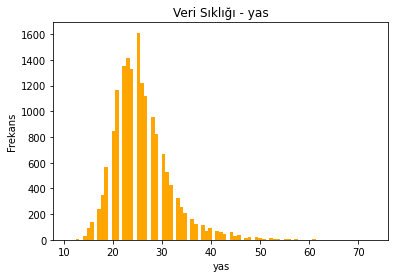

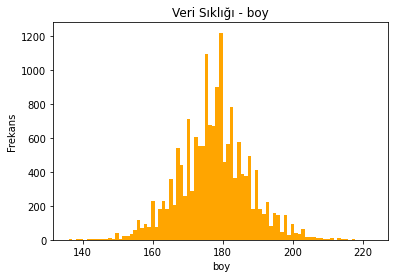

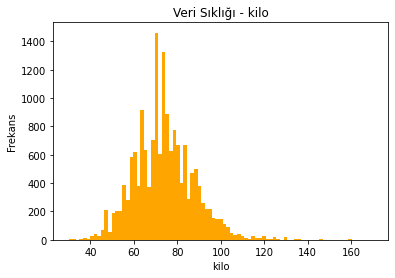

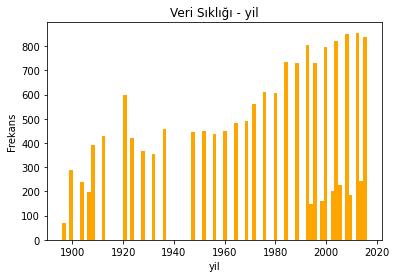

In [18]:
# tüm sayısal değişkenler için histogramları çizdirelim
sayısal_degisken = ["yas", "boy", "kilo", "yil"]
for i in sayısal_degisken:
    plotHistogram(i)

In [19]:
#sayısal verinin istatistiksel özellikleri
veri.describe()

,yas,boy,kilo,yil
count,16662.000000,16662.000000,16662.000000,16662.000000
mean,25.892546,177.570702,73.876264,1972.482895
std,5.787214,10.059977,13.804838,34.705548
min,11.000000,136.000000,30.000000,1896.000000
25%,22.000000,171.000000,64.000000,1948.000000
50%,25.000000,177.480000,73.000000,1980.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,170.000000,2016.000000


In [20]:
#öncelikle çubuk grafiğini çizdireceğimiz metodu yazalım
def plotBar(degisken, n = 5):
    """
        Girdi: Değişken/sütun ismi
               n = Gösterilecek eşsiz değer sayısı
        Çıktı: Çubuk grafiği
    """
    veri_ = veri[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color = "orange")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, veri_sayma))

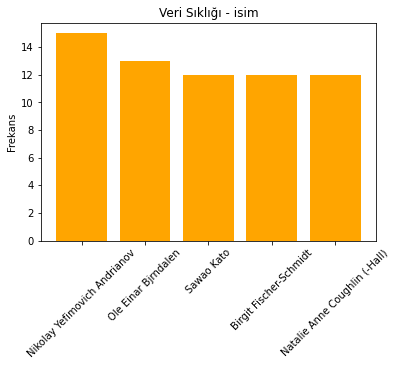

isim: 
 Nikolay Yefimovich Andrianov     15
Ole Einar Bjrndalen              13
Sawao Kato                       12
Birgit Fischer-Schmidt           12
Natalie Anne Coughlin (-Hall)    12
Name: isim, dtype: int64


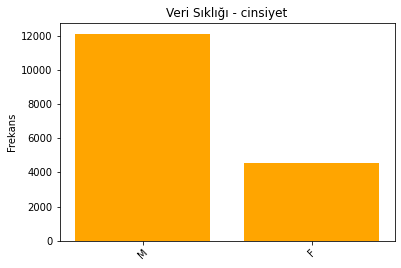

cinsiyet: 
 M    12136
F     4526
Name: cinsiyet, dtype: int64


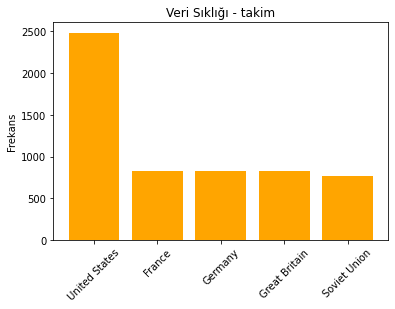

takim: 
 United States    2484
France            828
Germany           824
Great Britain     822
Soviet Union      765
Name: takim, dtype: int64


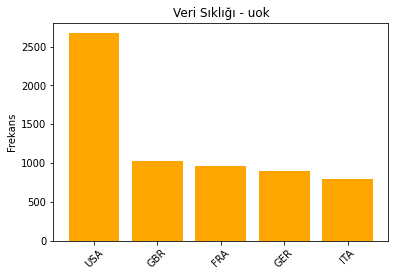

uok: 
 USA    2670
GBR    1020
FRA     961
GER     892
ITA     790
Name: uok, dtype: int64


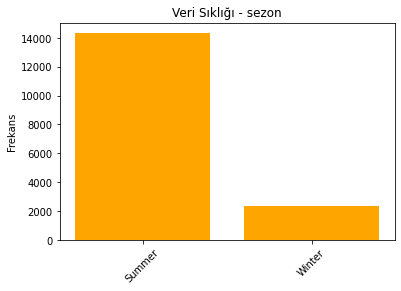

sezon: 
 Summer    14345
Winter     2317
Name: sezon, dtype: int64


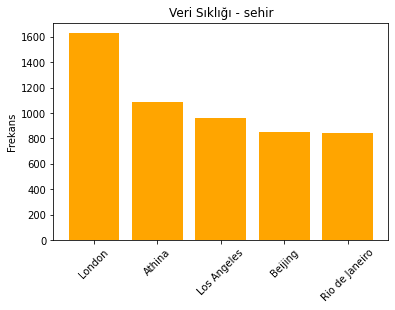

sehir: 
 London            1629
Athina            1085
Los Angeles        962
Beijing            850
Rio de Janeiro     840
Name: sehir, dtype: int64


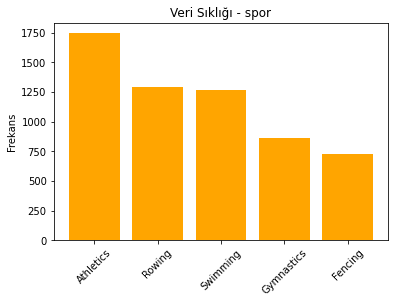

spor: 
 Athletics     1745
Rowing        1291
Swimming      1270
Gymnastics     865
Fencing        728
Name: spor, dtype: int64


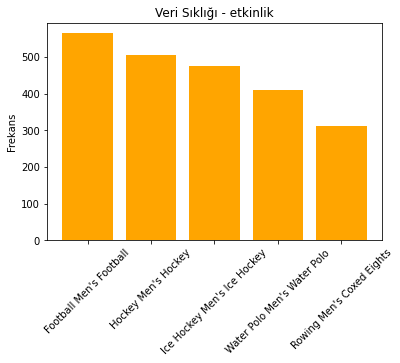

etkinlik: 
 Football Men's Football        565
Hockey Men's Hockey            505
Ice Hockey Men's Ice Hockey    476
Water Polo Men's Water Polo    410
Rowing Men's Coxed Eights      313
Name: etkinlik, dtype: int64


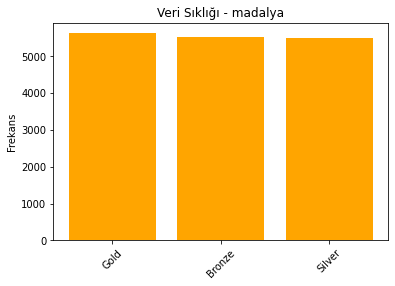

madalya: 
 Gold      5627
Bronze    5522
Silver    5513
Name: madalya, dtype: int64


In [21]:
kategorik_degisken = ["isim", "cinsiyet", "takim", "uok", "sezon", "sehir", "spor", "etkinlik", "madalya"]
for i in kategorik_degisken:
  plotBar(i)

In [22]:
#iki değişkenli veri analizi
#cinsiyete göre boy ve ağırlık karşılaştırması
erkek = veri[veri.cinsiyet == "M"]
erkek.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [23]:
kadin = veri[veri.cinsiyet == "F"]
kadin.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
17,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
19,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
21,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


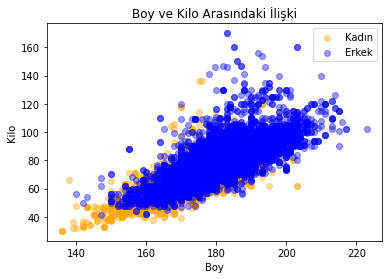

In [24]:
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha = 0.4, label = "Kadın", color = "orange")
plt.scatter(erkek.boy, erkek.kilo, alpha = 0.4, label = "Erkek", color = "blue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

In [25]:
#sayısal sütunlar arasında pozitif ilişki olduğunu anlıyoruz
veri.loc[:,["yas", "boy", "kilo"]].corr() #korelasyon tablosu

,yas,boy,kilo
yas,1.000000,0.060808,0.140270
boy,0.060808,1.000000,0.795391
kilo,0.140270,0.795391,1.000000


In [26]:
#madalya ve yaş arasındaki ilişki
#sporcularımızı altın, gümüş ve bronz madalyaya göre ayıralım
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns=['madalya'])
veri_gecici.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [27]:
veri_gecici.loc[:,["yas", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.004098,-0.003961,0.008081
madalya_Bronze,-0.004098,1.000000,-0.502757,-0.495087
madalya_Gold,-0.003961,-0.502757,1.000000,-0.502144
madalya_Silver,0.008081,-0.495087,-0.502144,1.000000


In [28]:
#takımların kazandıkları altın, gümüş, bornz madalya sayıları
veri_gecici[["takim", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(["takim"], as_index = False).sum().sort_values(by="madalya_Gold", ascending = False)[:10]

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
383,United States,577.0,1181.0,726.0
332,Soviet Union,237.0,320.0,208.0
137,Germany,287.0,268.0,269.0
124,France,298.0,259.0,271.0
177,Italy,241.0,253.0,241.0
142,Great Britain,284.0,241.0,297.0
57,Canada,183.0,201.0,176.0
162,Hungary,144.0,200.0,132.0
343,Sweden,249.0,186.0,225.0
14,Australia,233.0,165.0,209.0


In [29]:
#kazanılan madalyaların hangi şehirlerde kazanıldığı

veri_gecici[["sehir", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(["sehir"], as_index = False).sum().sort_values(by="madalya_Gold", ascending = False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,535.0,539.0,555.0
3,Athina,347.0,373.0,365.0
18,Los Angeles,311.0,339.0,312.0
6,Beijing,295.0,277.0,278.0
38,Sydney,263.0,269.0,263.0
27,Rio de Janeiro,284.0,267.0,289.0
4,Atlanta,264.0,238.0,229.0
5,Barcelona,245.0,225.0,221.0
26,Paris,199.0,220.0,240.0
33,Seoul,205.0,217.0,224.0


In [30]:
#pivot tablosu
veri_pivot = veri.pivot_table(index="madalya", columns="cinsiyet",
                              values=["boy", "kilo", "yas"],
                              aggfunc={"boy":np.mean,"kilo":np.mean,"yas":[min, max, np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.310860  180.207625  62.748205  77.963829  69.0  72.0  13.0   
Gold      169.844117  180.591044  62.420646  78.271266  46.0  64.0  13.0   
Silver    170.373159  180.180987  62.618251  78.012052  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    14.0  5.245021  5.831385  
Gold      13.0  5.201034  5.890964  
Silver    14.0  5.377999  5.939552

In [31]:
#anomali tespiti
def anomaliTespiti(df, ozellik):
    outlier_indices = []

    for c in ozellik:
      #1. çeyrek
      Q1 = np.percentile(df[c], 25)
      #3.çeyrek
      Q3 = np.percentile(df[c],75)
      # IQR = Inter Quartile Range 
      IQR = Q3 - Q1
      #aykırı değer için ek adım miktarı
      outlier_step = 1.5 * IQR
      #aykırı değerleri ve de bulunduğu indeksi tespit edelim
      outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
      #tespit edilen indeksleri depolayalım
      outlier_indices.extend(outlier_list_col)

      #eşsiz aykırı değerleri bulalım
      outlier_indices = Counter(outlier_indices)
      #eğer bir örnek v adet sütunda farklı değer ise bunu aykırı kabul edelim
      multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)

      return multiple_outliers



In [32]:
veri_anomali = veri.loc[anomaliTespiti(veri, ["yas","kilo","boy"])]
veri_anomali.spor.value_counts()

Series([], Name: spor, dtype: int64)

In [33]:
#plt.figure()
#plt.bar(veri_anomali.spor.value_counts().index, veri_anomali.spor.value_counts().values)
#plt.xtricks(rotation =0)
#plt.title("A nomlaiye Rastlanan Spor Branşları")
#plt.ylabel("Frekans")
#plt.grid(True, alpha = 0.5)
#plt.show()


In [34]:
veri_gym = veri_anomali[veri_anomali.spor == "Gymnastics"]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
